<a href="https://colab.research.google.com/github/mufeedac/py/blob/master/digit_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
len(y_test)

10000

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

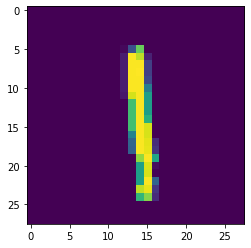

In [ ]:
plt.imshow(x_train[8])

In [ ]:
y_train[8]

1

In [ ]:
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [ ]:
x_train_flattened.shape

(60000, 784)

In [ ]:
x_test_flattened.shape

(10000, 784)

In [ ]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4726 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3047 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9252


In [ ]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2694 - accuracy: 0.9243


[0.26943475008010864, 0.9243000149726868]

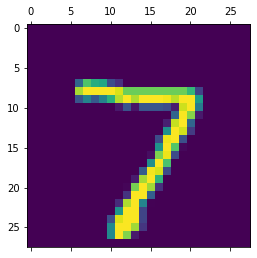

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_predicted=model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_predicted[0]

array([1.8214809e-02, 5.3476111e-07, 6.4503305e-02, 9.7096902e-01,
       3.5307910e-03, 1.6866049e-01, 1.4218252e-06, 9.9984193e-01,
       9.6314378e-02, 6.6757149e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

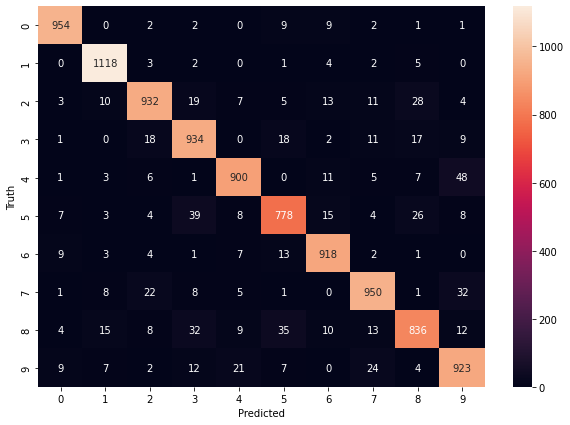

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2683 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1224 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0851 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0657 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0508 - accuracy: 0.9844


In [ ]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0820 - accuracy: 0.9750


[0.08195804804563522, 0.9750000238418579]

Text(69.0, 0.5, 'Truth')

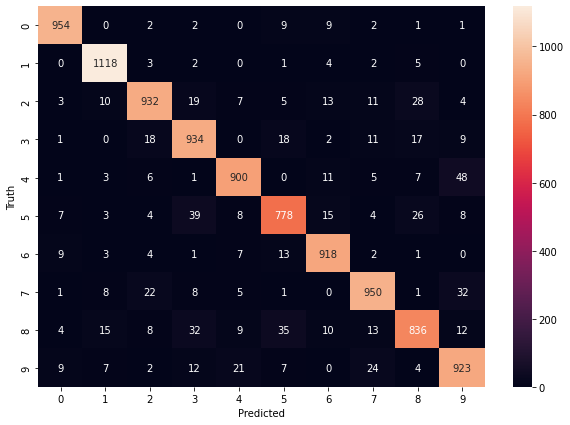

In [ ]:
keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2728 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1210 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0837 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0638 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0508 - accuracy: 0.9842
